This exercise followed the instructions of [_Python Machine Learning_](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning-second-edition), chapter 10

The choice of dataset is inspired by https://github.com/yiqingyang75/machine_learning_assign/blob/master/py/K-Means%20Clustering.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
%matplotlib inline

In [3]:
df = pd.read_csv('wine.csv', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', \
                   'OD280/OD315 of diluted wines', 'Proline']

# Elbow Method to Find Optimal K for K-Means++

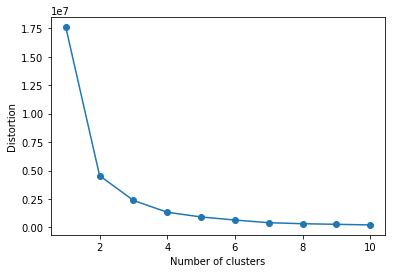

In [4]:
x = df.iloc[:,1:]
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Silhouette Plot to test K = 3 and 4

In [5]:
# Test k = 3
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

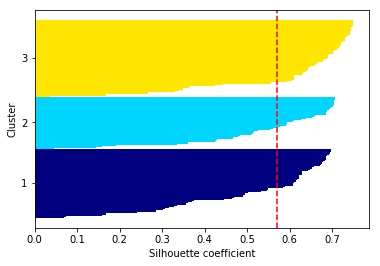

In [6]:
silhouette_vals = silhouette_samples(x, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [7]:
# Test k = 4
kmeans = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

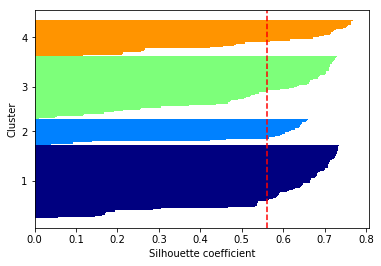

In [8]:

silhouette_vals = silhouette_samples(x, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

# K-Means++ Final Result

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_
df["cluster"] = labels

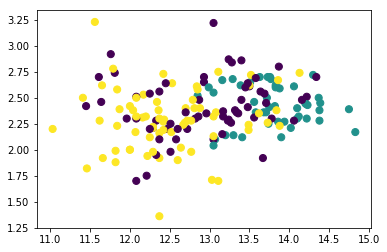

In [10]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c= df["cluster"], s=50, cmap='viridis')

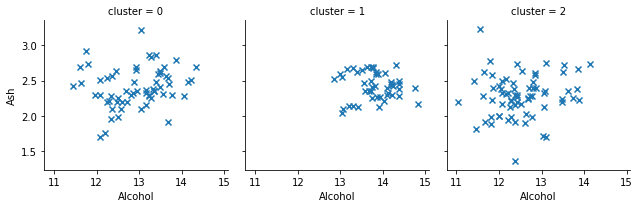

In [11]:
g = sns.FacetGrid(df, col="cluster")
g = g.map(plt.scatter, "Alcohol", "Ash", marker="x")